In [18]:
import pandas as pd
import pvlib
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('resultados.csv') 
data = data.drop(columns='Unnamed: 0')
data['Datetime'] = pd.to_datetime(data['Datetime'])  
display(data)

,Real,Predito,Datetime,Theta,GHI,DNI,DHI
0,60.0,60.0,2019-11-12 19:00:00,0.0,0,0,0
1,60.0,60.0,2019-11-12 19:30:00,0.0,0,0,0
2,60.0,60.0,2019-11-12 20:00:00,0.0,0,0,0
3,60.0,60.0,2019-11-12 20:30:00,0.0,0,0,0
4,60.0,52.8,2019-11-12 21:00:00,0.0,0,0,0
...,...,...,...,...,...,...,...
293,60.0,15.0,2019-11-18 21:30:00,0.0,0,0,0
294,15.0,15.0,2019-11-18 22:00:00,0.0,0,0,0
295,15.0,15.0,2019-11-18 22:30:00,0.0,0,0,0
296,15.0,15.0,2019-11-18 23:00:00,0.0,0,0,0


In [20]:
latitude = -23.55052
longitude = -46.633308
altitude = 590
albedo = 0.08

In [21]:
def calculate_irradiance(row, angle, latitude, longitude):
    solar_position = pvlib.solarposition.get_solarposition(row['Datetime'], latitude, longitude)
    dni_extra = pvlib.irradiance.get_extra_radiation(row['Datetime'])

    poa_components = pvlib.irradiance.get_total_irradiance(
        surface_tilt=angle,
        surface_azimuth=90,
        dni=row['DNI'],
        ghi=row['GHI'],
        dhi=row['DHI'],
        solar_zenith=solar_position['zenith'],
        solar_azimuth=solar_position['azimuth'],
        dni_extra=dni_extra,
        airmass=pvlib.atmosphere.get_relative_airmass(solar_position['zenith']),
        albedo=albedo
    )
    total_irrad = poa_components['poa_global'].iloc[0] # iloc pega o valor numerico da série
    return total_irrad

In [22]:
irradiancias_IA = []  # Se for inicializada dentro do loop ela é zerada a cada iteração
irradiancias_SPA = []
for i, row in data.iterrows():
  angle = row['Predito'] # Vai pegar somente o angulo especifico de cada linha da iteração
  angle2 = row['Theta']
  irradiance = calculate_irradiance(row, angle, latitude, longitude)
  irradiance2 = calculate_irradiance(row, angle2, latitude, longitude)
  irradiancias_IA.append(irradiance)
  irradiancias_SPA.append(irradiance2)

data['irradiancias IA'] = irradiancias_IA
data['irradiancias SPA'] = irradiancias_SPA
 

In [23]:
display(data)

,Real,Predito,Datetime,Theta,GHI,DNI,DHI,irradiancias IA,irradiancias SPA
0,60.0,60.0,2019-11-12 19:00:00,0.0,0,0,0,0.0,0.0
1,60.0,60.0,2019-11-12 19:30:00,0.0,0,0,0,0.0,0.0
2,60.0,60.0,2019-11-12 20:00:00,0.0,0,0,0,0.0,0.0
3,60.0,60.0,2019-11-12 20:30:00,0.0,0,0,0,0.0,0.0
4,60.0,52.8,2019-11-12 21:00:00,0.0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
293,60.0,15.0,2019-11-18 21:30:00,0.0,0,0,0,0.0,0.0
294,15.0,15.0,2019-11-18 22:00:00,0.0,0,0,0,0.0,0.0
295,15.0,15.0,2019-11-18 22:30:00,0.0,0,0,0,0.0,0.0
296,15.0,15.0,2019-11-18 23:00:00,0.0,0,0,0,0.0,0.0


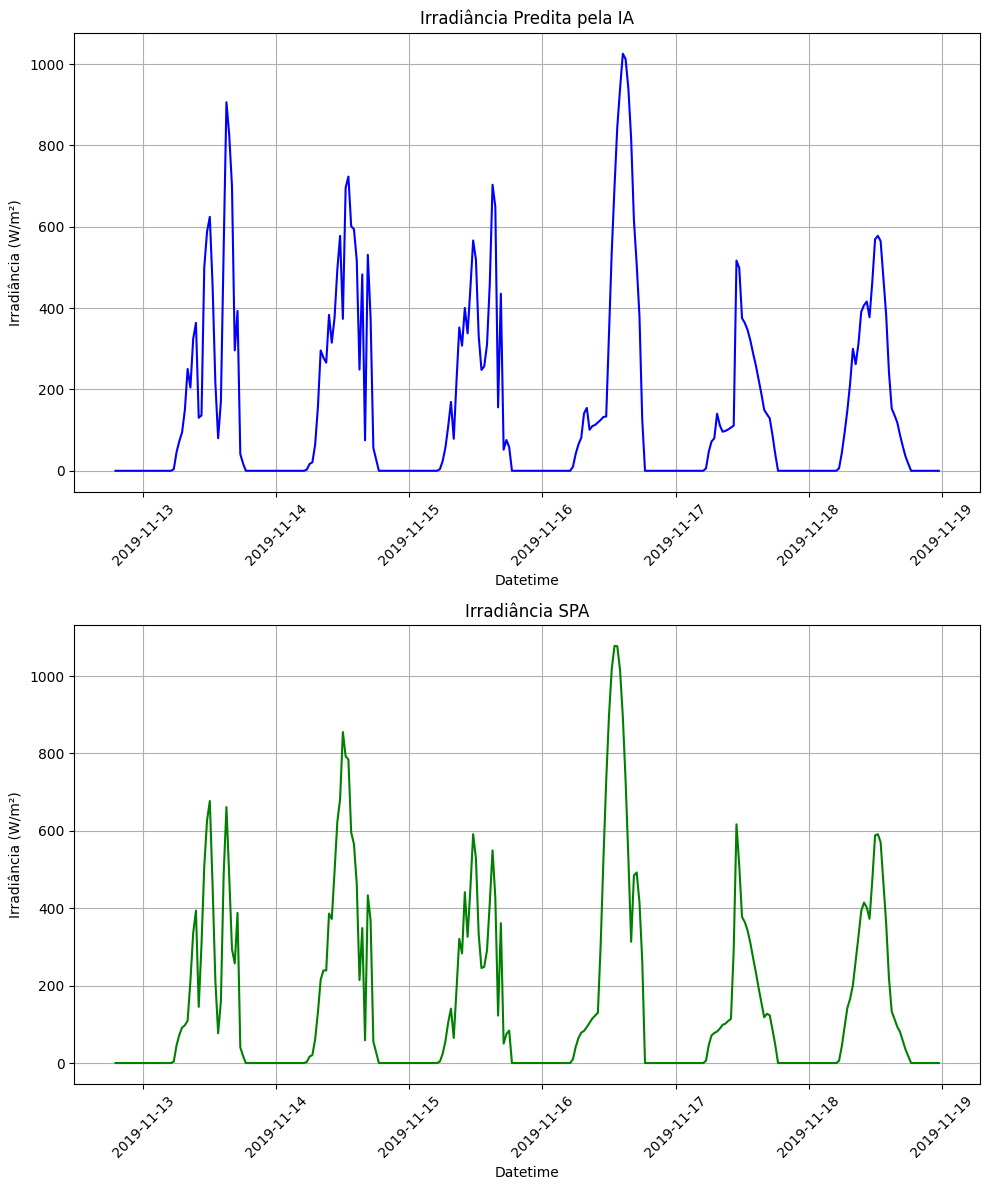

In [24]:
import matplotlib.pyplot as plt

# Criar uma figura com dois subplots (um para cada curva)
plt.figure(figsize=(10, 12))  # Tamanho da figura

# Primeiro subplot para Irradiância IA
plt.subplot(2, 1, 1)  # (número de linhas, número de colunas, índice do plot)
plt.plot(data['Datetime'], data['irradiancias IA'], label='Irradiância IA', color='blue')
plt.xlabel('Datetime')
plt.ylabel('Irradiância (W/m²)')
plt.title('Irradiância Predita pela IA')
plt.xticks(rotation=45)
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()

# Segundo subplot para Irradiância SPA
plt.subplot(2, 1, 2)
plt.plot(data['Datetime'], data['irradiancias SPA'], label='Irradiância SPA', color='green')
plt.xlabel('Datetime')
plt.ylabel('Irradiância (W/m²)')
plt.title('Irradiância SPA')
plt.xticks(rotation=45)
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [17]:
data.to_excel("data.xlsx")